In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
# #for running on conda env = tf
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install sklearn

In [8]:
# pip install "numpy<2"

In [9]:
import tensorflow as tf
print("TensorFlow CUDA version:", tf.__version__)
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("CUDA devices available:", tf.test.gpu_device_name())
print(tf.config.list_physical_devices('GPU'))


TensorFlow CUDA version: 2.6.0
Built with CUDA: True
CUDA devices available: /device:GPU:0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
import tensorflow as tf
print(tf.sysconfig.get_build_info())

OrderedDict([('cpu_compiler', 'C:/Program Files (x86)/Microsoft Visual Studio/2019/Community/VC/Tools/MSVC/14.27.29110/bin/HostX64/x64/cl.exe'), ('cuda_compute_capabilities', ['sm_35', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'compute_80']), ('cuda_version', '64_112'), ('cudart_dll_name', 'cudart64_112.dll'), ('cudnn_dll_name', 'cudnn64_8.dll'), ('cudnn_version', '64_8'), ('is_cuda_build', True), ('is_rocm_build', False), ('is_tensorrt_build', False), ('msvcp_dll_names', 'msvcp140.dll,msvcp140_1.dll'), ('nvcuda_dll_name', 'nvcuda.dll')])


Step1: Define your problem

Data has wafer images.
Classify for Center, Donut, Edge-Loc, Edge-Ring, Loc, Random, Scratch, Near-full, none.

In [11]:
import os
print(os.listdir("../input"))
import warnings
warnings.filterwarnings("ignore")

['LSWMD.pkl']


Step2: Data Prep

Data summary
Distribution
Missing data handling

This has over 811K data, so be careful!

In [12]:
df=pd.read_pickle("../input/LSWMD.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [13]:
# df.head()

In [14]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


In [15]:
df['failureType'][811452][0][0]
#So this is how to print it. Okay.

'Edge-Ring'

In [16]:
df['trianTestLabel'][811452][0][0]
#So this is how to print it. Okay.

'Test'

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [18]:
df.describe()

,dieSize,waferIndex
count,811457.000000,811457.000000
mean,1840.998585,12.961207
std,2254.987374,7.207489
min,3.000000,1.000000
25%,710.000000,7.000000
50%,953.000000,13.000000
75%,1902.000000,19.000000
max,48099.000000,25.000000


In [19]:
df.dtypes

waferMap           object
dieSize           float64
lotName            object
waferIndex        float64
trianTestLabel     object
failureType        object
dtype: object

In [20]:
df['waferMap'][0].shape

(45, 48)

In [21]:
df['waferMap'][1000].shape

(26, 26)

Not all wafers have the same waferMap..

But how do they differ?

In [22]:
df2 = df[df['waferIndex'] == 1.0].reset_index()
df2.shape

(32516, 7)

In [23]:
df2['waferMap'][0].shape

(45, 48)

In [24]:
df2['waferMap'][1].shape

(53, 58)

Not even by same waferindex.. pass!

In [25]:
df['waferIndex'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

In [26]:
unique_wafer = np.unique(df.waferIndex, return_counts=True)
unique_wafer

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.]),
 array([32516, 32663, 32621, 32714, 32701, 32745, 32672, 32650, 32636,
        32586, 32637, 32598, 32381, 32353, 32301, 32362, 32333, 32333,
        32285, 32290, 32320, 32312, 32202, 32197, 32049], dtype=int64))

In [27]:
df.shape

(811457, 6)

In [28]:
811457/25

32458.28

<function matplotlib.pyplot.show(close=None, block=None)>

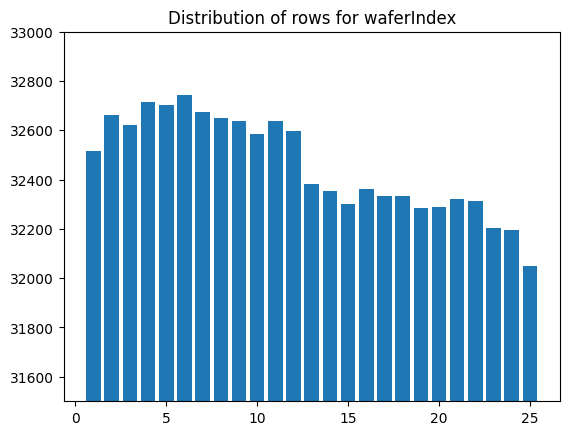

In [29]:
plt.bar(unique_wafer[0],unique_wafer[1])
plt.title('Distribution of rows for waferIndex')
plt.ylim(31500,33000)
plt.show

Not all waferindex contains the same rows, but who cares.

Lets handle Missing Values

In [30]:
df.isnull().sum()

waferMap          0
dieSize           0
lotName           0
waferIndex        0
trianTestLabel    0
failureType       0
dtype: int64

..There are no missing values!

In [31]:
def flatten(items):
    """To see the unique values of failureType, Although we are provided with it..."""
    for item in items:
        if isinstance(item, (list, np.ndarray)):  # If numpy array
            yield from flatten(item)  # Recursively flatten it
        else:
            yield item  # If done, return

all_failures = flatten(df['failureType'])
unique_failures = set(all_failures)
print(unique_failures)
print(len(unique_failures))

{'Donut', 'Center', 'Edge-Ring', 'Scratch', 'Near-full', 'Edge-Loc', 'none', 'Loc', 'Random'}
9


In [32]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [33]:
from collections import Counter
import seaborn as sns

Exactly as provided.
But then, whats the ratio?

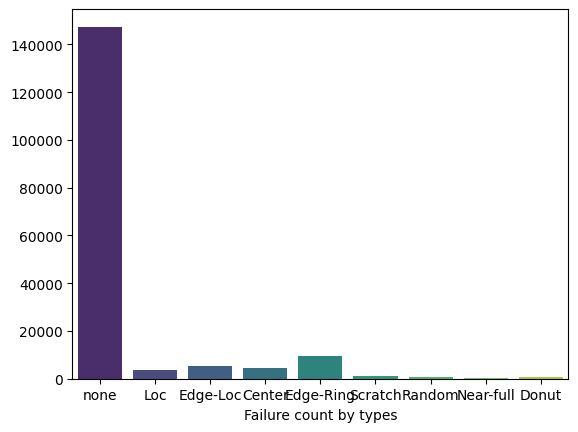

In [34]:
failure_counts = Counter(flatten(df['failureType']))
labels, values = zip(*failure_counts.items())

sns.barplot(x=list(labels), y=list(values), palette="viridis")
plt.xlabel("Failure count by types")
plt.show()

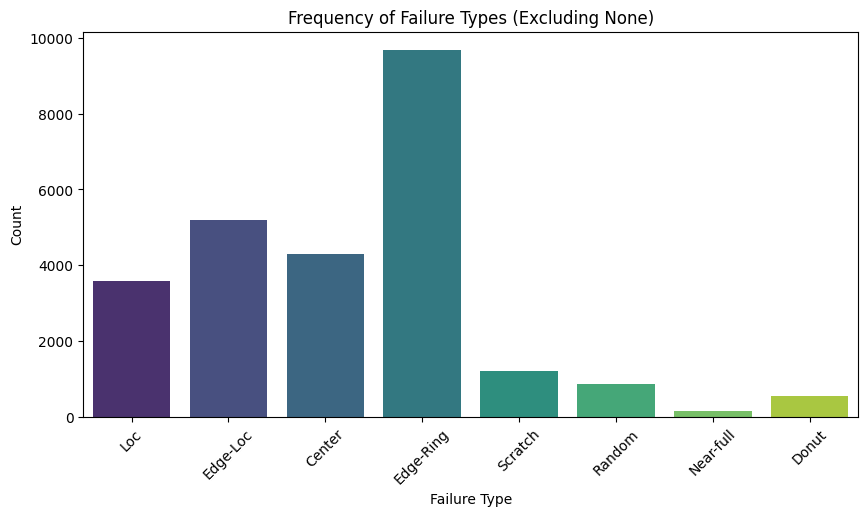

In [35]:
failure_counts_without_none = Counter(f for f in flatten(df['failureType']) if f.lower() != "none")

labels, values = zip(*failure_counts_without_none.items())

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=list(labels), y=list(values), palette="viridis")
plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.title("Frequency of Failure Types (Excluding None)")
plt.xticks(rotation=45)
plt.show()

Most of them are no label (probably no problem)
For failures, occurence differs widely.

For this case, we drop ones without defects.

In [36]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


Before that, lets flatten..

In [37]:
print(df["failureType"].apply(type).unique())

[<class 'numpy.ndarray'>]


In [38]:
df['failureType'] = df['failureType'].apply(lambda x: np.array(x).flatten())

In [39]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[none]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[none]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[none]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[none]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[none]


In [40]:
df['trianTestLabel'] = df['trianTestLabel'].apply(lambda x: np.array(x).flatten())

In [41]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[Training],[none]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[Training],[none]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[Training],[none]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[Training],[none]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[Training],[none]


In [42]:
total_wafers = df.shape[0]
total_wafers

811457

In [43]:
df['failureNum']=df.failureType
df['trainTestNum']=df.trianTestLabel
mapping_type={'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8}
mapping_traintest={'Training':0,'Test':1}
df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

In [44]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,failureNum,trainTestNum
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[Test],[Edge-Ring],3,1
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[Test],[Edge-Loc],2,1
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[Test],[Edge-Ring],3,1
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[],[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[],[],[]


In [45]:
df2 = df.copy()

In [46]:
df2 = df2.drop(columns=['lotName','dieSize','waferIndex'])

Now get a withlabel(where label is not [])
and a withpattern(where label is not none and not [])

In [47]:
df_withlabel = df[(df['failureNum']>=0) & (df['failureNum']<=8)]
df_withlabel =df_withlabel.reset_index()
df_withpattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)]
df_withpattern = df_withpattern.reset_index()
df_nonpattern = df[(df['failureNum']==8)]
df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]

(172950, 25519, 147431)

In [ ]:
# df2_withlabel = df2[(df2['failureNum']>=0) & (df2['failureNum']<=8)]
# df2_withlabel =df2_withlabel.reset_index()
# df2_withpattern = df2[(df2['failureNum']>=0) & (df2['failureNum']<=7)]
# df2_withpattern = df2_withpattern.reset_index()
# df2_nonpattern = df2[(df2['failureNum']==8)]
# df2_withlabel.shape[0], df2_withpattern.shape[0], df2_nonpattern.shape[0]

(172950, 25519, 147431)

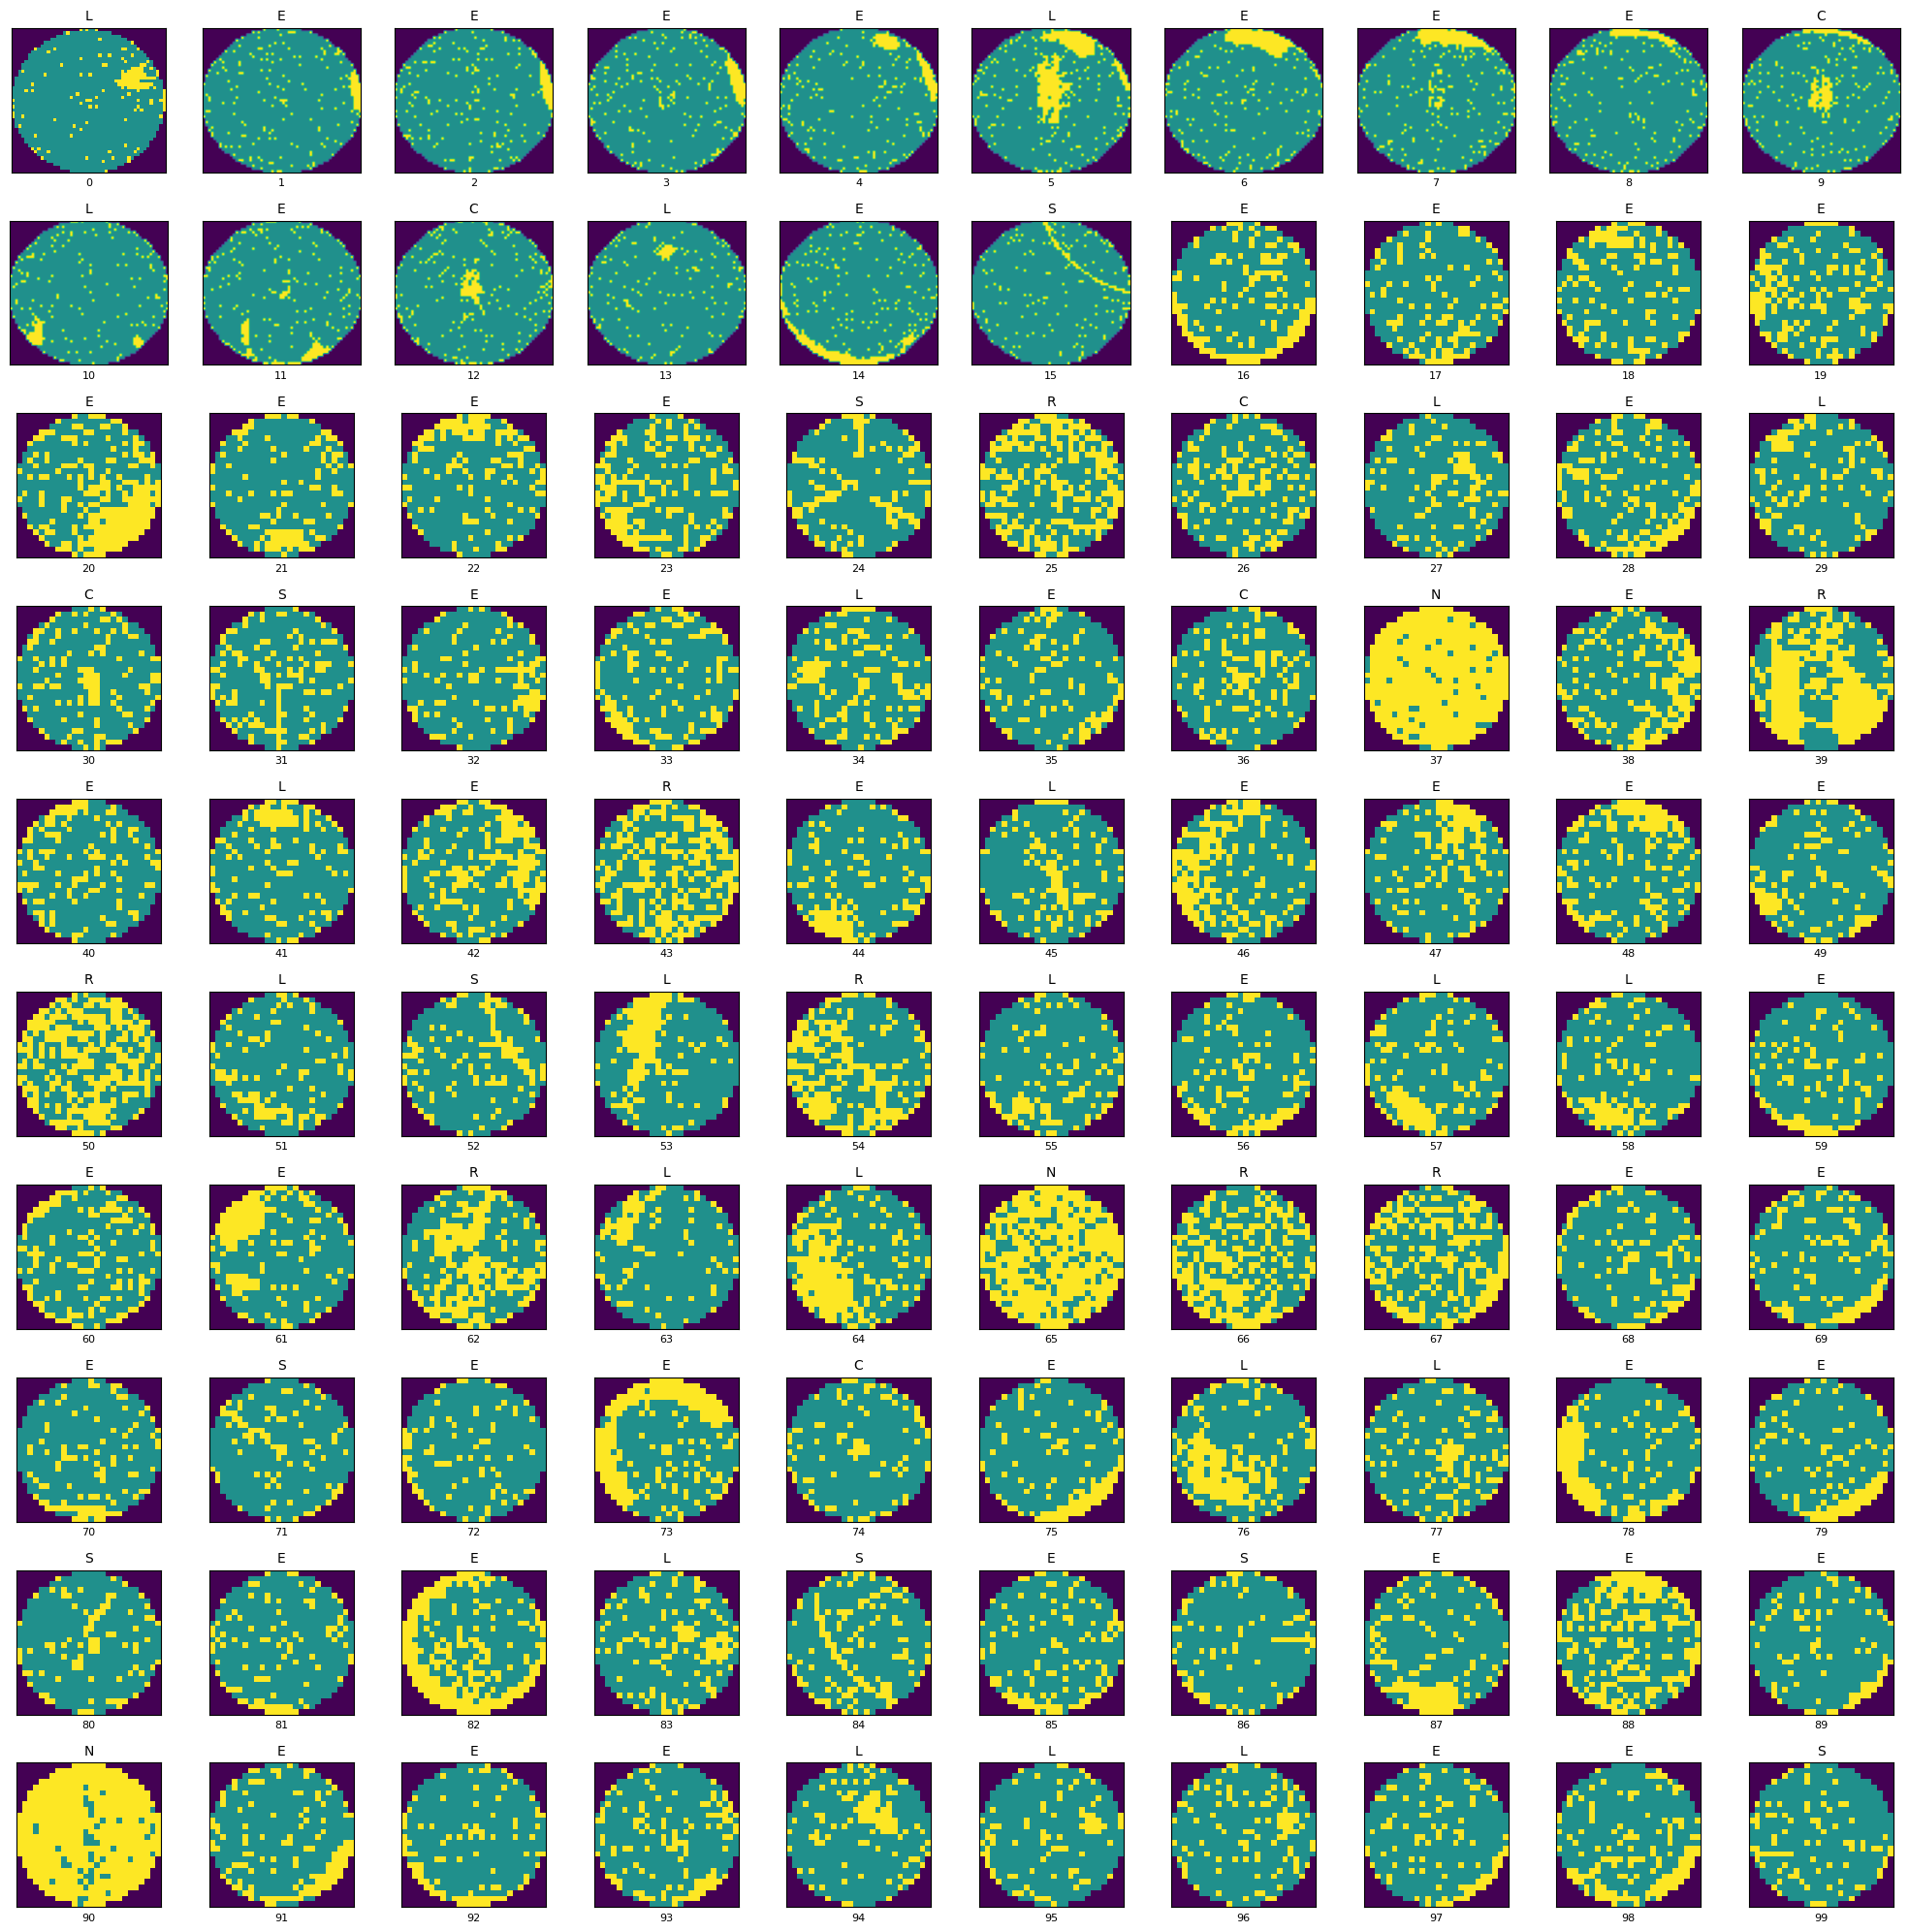

In [49]:
fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(20, 20))
ax = ax.ravel(order='C')
for i in range(100):
    img = df_withpattern.waferMap[i]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[i][0][0], fontsize=10)
    ax[i].set_xlabel(df_withpattern.index[i], fontsize=8)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

#Wafer Samples. Code refered from NOWYSM's article!

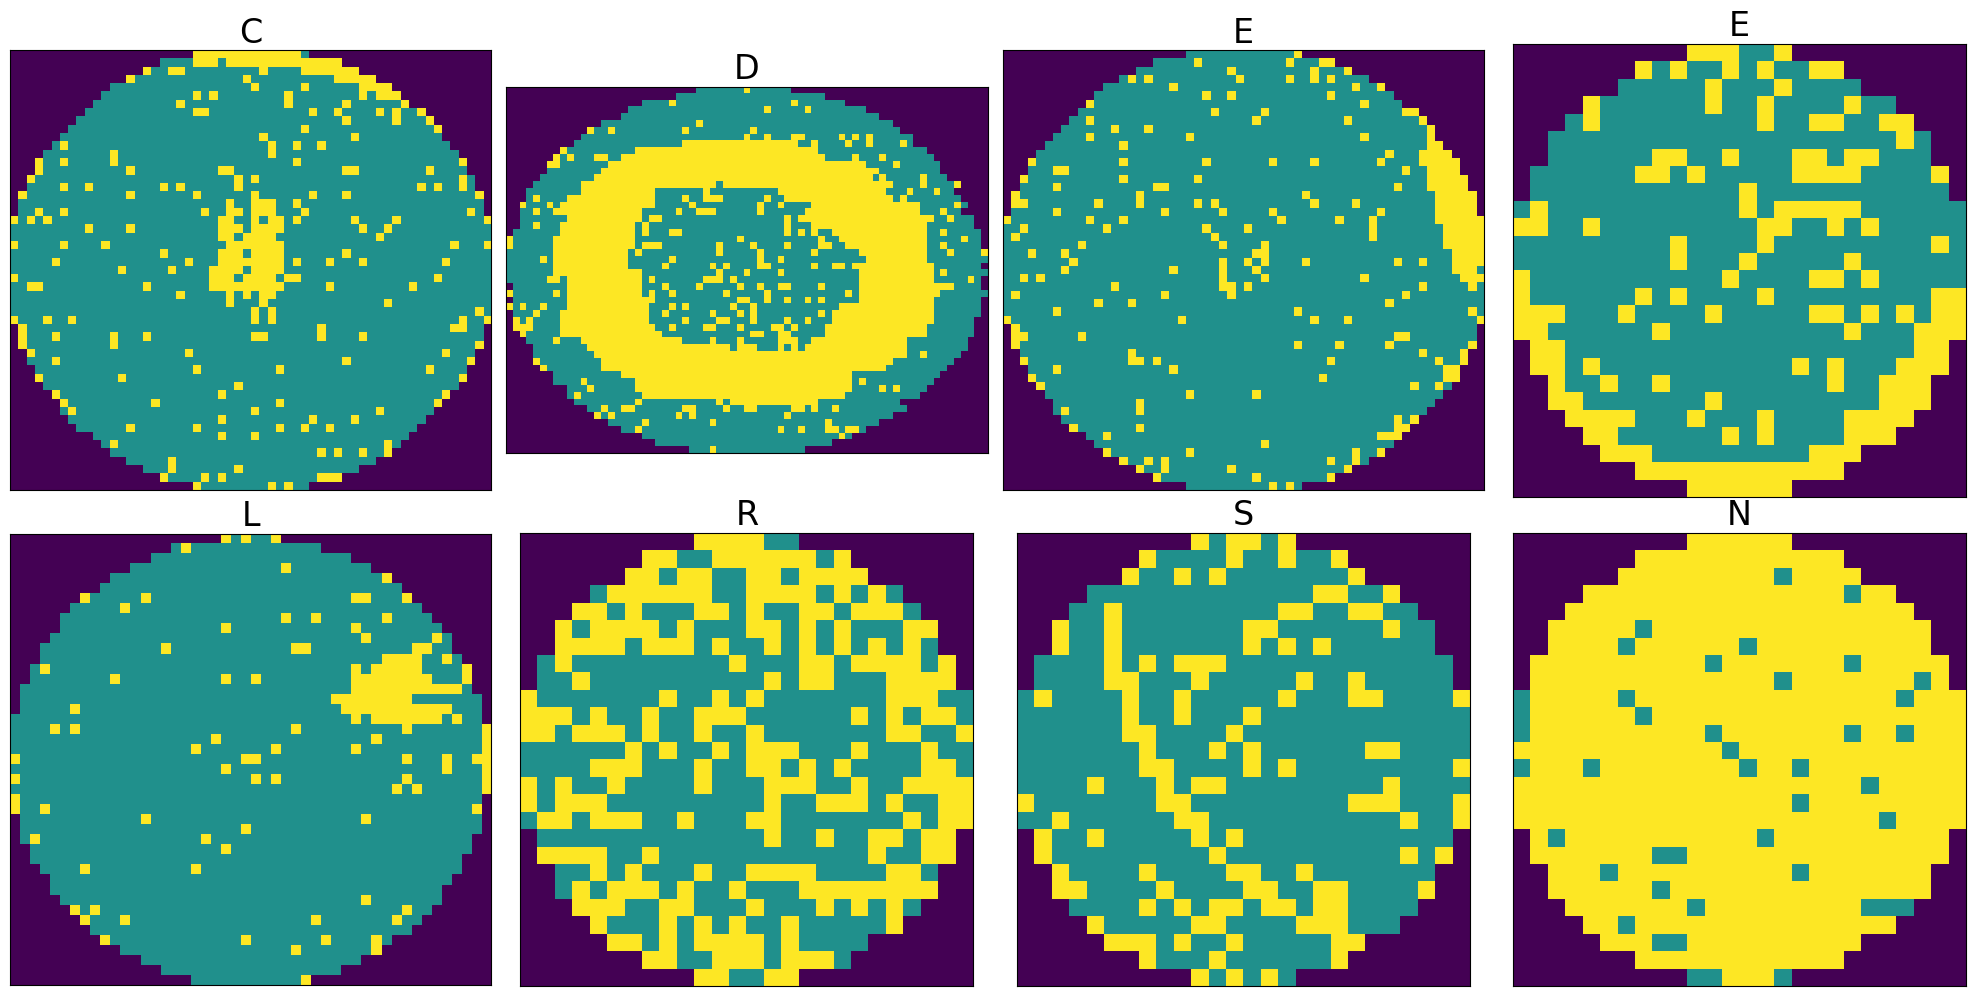

In [50]:
x = [9,340, 3, 16, 0, 25, 84, 37]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

#ind_def = {'Center': 9, 'Donut': 340, 'Edge-Loc': 3, 'Edge-Ring': 16, 'Loc': 0, 'Random': 25,  'Scratch': 84, 'Near-full': 37}
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    img = df_withpattern.waferMap[x[i]]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[x[i]][0][0],fontsize=24)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

Well, these seem to be images that require understanding of locational information, so we will first try CNN Deeplearning.

In [51]:
# import tensorflow as tf
# import numpy as np
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# # Load your dataset (assuming df is already created)
# df = df.dropna(subset=['waferMap'])  # Remove empty wafer maps

# # Convert wafer maps from lists to numpy arrays
# df['waferMap'] = df['waferMap'].apply(lambda x: np.array(x))

# # Normalize wafer images (convert values to range [0,1])
# df['waferMap'] = df['waferMap'].apply(lambda x: x.astype('float32') / x.max())

# # Extract only labeled data (ignore missing failureType)
# df_labeled = df[df['failureType'].apply(lambda x: len(x) > 0)].copy()

# # Convert failureType to numerical labels
# label_map = {label: idx for idx, label in enumerate(df_labeled['failureType'].explode().unique())}
# df_labeled['label'] = df_labeled['failureType'].apply(lambda x: label_map[x[0]])  # Use the first label

# # Convert labels to categorical (one-hot encoding for CNN)
# y = to_categorical(df_labeled['label'])

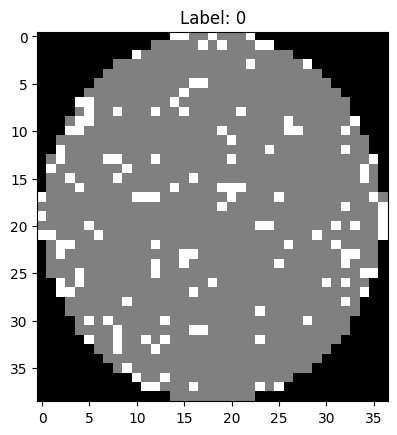

In [52]:
#for 2.6
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your dataset (assuming df is already created)
df = df.dropna(subset=['waferMap'])  # Remove empty wafer maps

# Convert wafer maps from lists to numpy arrays
df['waferMap'] = df['waferMap'].apply(lambda x: np.array(x))

# Normalize wafer images (convert values to range [0,1])
df['waferMap'] = df['waferMap'].apply(lambda x: x.astype('float32') / x.max())

# Extract only labeled data (ignore missing failureType)
df_labeled = df[df['failureType'].apply(lambda x: len(x) > 0)].copy()

# Convert failureType to numerical labels
label_map = {label: idx for idx, label in enumerate(df_labeled['failureType'].explode().unique())}
df_labeled['label'] = df_labeled['failureType'].apply(lambda x: label_map[x[0]])  # Use the first label

# Convert labels to categorical (one-hot encoding for CNN)
y = to_categorical(df_labeled['label'])
# Extract wafer maps (assuming they are numpy arrays)
X = np.array(df_labeled['waferMap'].tolist())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Visualize a sample wafer map
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {np.argmax(y_train[0])}")
plt.show()


In [53]:
# #for 2.6, df2
# # Load your dataset (assuming df is already created)
# df2 = df2.dropna(subset=['waferMap'])  # Remove empty wafer maps

# # Convert wafer maps from lists to numpy arrays
# df2['waferMap'] = df2['waferMap'].apply(lambda x: np.array(x))

# # Normalize wafer images (convert values to range [0,1])
# df2['waferMap'] = df2['waferMap'].apply(lambda x: x.astype('float32') / x.max())

# # Extract only labeled data (ignore missing failureType)
# df2_labeled = df2[df2['failureType'].apply(lambda x: len(x) > 0)].copy()

# # Convert failureType to numerical labels
# label_map = {label: idx for idx, label in enumerate(df2_labeled['failureType'].explode().unique())}
# df2_labeled['label'] = df2_labeled['failureType'].apply(lambda x: label_map[x[0]])  # Use the first label

# # Convert labels to categorical (one-hot encoding for CNN)
# y2 = to_categorical(df2_labeled['label'])
# # Extract wafer maps (assuming they are numpy arrays)
# X2 = np.array(df2_labeled['waferMap'].tolist())

# # Split the dataset into training and testing sets
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# # Optional: Visualize a sample wafer map
# plt.imshow(X2_train[0], cmap='gray')
# plt.title(f"Label: {np.argmax(y2_train[0])}")
# plt.show()


In [54]:
# !pip install scikit-learn

In [55]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

print("Preparing images for resizing...")
# Prepare images by adding a channel dimension
images = [img[..., np.newaxis] for img in df_labeled['waferMap'] if img.size > 0]
print(f"Prepared {len(images)} images for resizing.")

resized_images = []
for i, img in enumerate(images):
    input_tensor = img[np.newaxis, ...]
    resized_tensor = tf.image.resize(input_tensor, [32, 32])
    resized_images.append(np.squeeze(resized_tensor.numpy(), axis=0))

    # Optional: Print progress every 1000 images
    if (i + 1) % 50000 == 0:
        print(f"Resized {i + 1} images.")

print(f"Resized {len(resized_images)} images in total.")

# Convert the list of resized images to a numpy array
X = np.array(resized_images)

print("Splitting data into training and testing sets...")
# Assuming 'y' is defined elsewhere in your code and corresponds to your labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape}, Testing samples: {X_test.shape}")
print("Done!")

Preparing images for resizing...
Prepared 172950 images for resizing.
Resized 50000 images.
Resized 100000 images.
Resized 150000 images.
Resized 172950 images in total.
Splitting data into training and testing sets...
Training samples: (138360, 32, 32, 1), Testing samples: (34590, 32, 32, 1)
Done!


In [56]:
# print("Preparing images for resizing...")
# # Prepare images by adding a channel dimension
# images2 = [img[..., np.newaxis] for img in df2_labeled['waferMap'] if img.size > 0]
# print(f"Prepared {len(images2)} images for resizing.")

# resized_images2 = []
# for i, img in enumerate(images2):
#     input_tensor2 = img[np.newaxis, ...]
#     resized_tensor2 = tf.image.resize(input_tensor2, [32, 32])
#     resized_images2.append(np.squeeze(resized_tensor2.numpy(), axis=0))

#     # Optional: Print progress every 1000 images
#     if (i + 1) % 50000 == 0:
#         print(f"Resized {i + 1} images.")

# print(f"Resized {len(resized_images2)} images in total.")

# # Convert the list of resized images to a numpy array
# X2 = np.array(resized_images2)

# print("Splitting data into training and testing sets...")
# # Assuming 'y' is defined elsewhere in your code and corresponds to your labels
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# print(f"Training samples: {X2_train.shape}, Testing samples: {X2_test.shape}")
# print("Done!")

In [57]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# # Define the CNN model
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 1)),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Conv2D(128, (3,3), activation='relu'),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(y.shape[1], activation='softmax')  # Output layer with softmax
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [58]:
# model2 = Sequential([
#     Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 1)),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Conv2D(64, (3,3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Conv2D(128, (3,3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(y.shape[1], activation='softmax')  # Output layer with softmax
# ])


# # Compile the model
# model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model2.summary()

In [59]:
# model3 = Sequential([
#     Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 1)),
#     Conv2D(32, (3,3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),  # Dropout is correctly placed here
#     Dense(y_train.shape[1], activation='softmax')
# ])


# # Compile the model
# model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model3.summary()

In [60]:
# from tensorflow.keras.layers import GlobalAveragePooling2D

# model3_v2 = Sequential([
#     Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 1)),
#     BatchNormalization(),
#     Conv2D(32, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2,2)),
#     Dropout(0.25),
    
#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2,2)),
#     Dropout(0.25),
    
#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2,2)),
#     Dropout(0.5),
    
#     GlobalAveragePooling2D(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(y_train.shape[1], activation='softmax')
# ])

# # Compile the model
# model3_v2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model3_v2.summary()

In [61]:
# model4 = Sequential([
#     Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 1)),
#     Conv2D(32, (3,3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Conv2D(256, (3,3), activation='relu', padding='same'),
#     Conv2D(256, (3,3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2)),

#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(y_train.shape[1], activation='softmax')
# ])


# # Compile the model
# model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model4.summary()

In [62]:
# model5 = Sequential([
#     Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 1)),
#     Conv2D(32, (3,3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2)),

#     Dense(32, activation='relu'),
    
#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Dense(64, activation='relu'),

#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2)),
    
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(y_train.shape[1], activation='softmax')
# ])


# # Compile the model
# model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model5.summary()

In [63]:
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# model_checkpoint = ModelCheckpoint('./best_model.h5', monitor='val_loss', save_best_only=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.00001)

# with tf.device('/gpu:0'):
#     history = model.fit(X_train, y_train, epochs=20, batch_size=32,
#                         validation_data=(X_test, y_test), 
#                         callbacks=[early_stopping, model_checkpoint, reduce_lr])
    
# # plt.plot(history.history['accuracy'], label='Train Accuracy')
# # plt.plot(history.history['val_accuracy'], label='Test Accuracy')
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.show()

In [64]:
# model2_checkpoint = ModelCheckpoint('./best_model2.h5', monitor='val_loss', save_best_only=True)

# with tf.device('/gpu:0'):
#     history2 = model2.fit(X_train, y_train, epochs=20, batch_size=32,
#                         validation_data=(X_test, y_test), 
#                         callbacks=[early_stopping, model2_checkpoint, reduce_lr])
    
# # plt.plot(history.history['accuracy'], label='Train Accuracy')
# # plt.plot(history.history['val_accuracy'], label='Test Accuracy')
# plt.plot(history2.history['loss'], label='Train Loss')
# plt.plot(history2.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.show()

In [65]:
# model3_checkpoint = ModelCheckpoint('./best_model3.h5', monitor='val_loss', save_best_only=True)

# with tf.device('/gpu:0'):
#     history3 = model3.fit(X_train, y_train, epochs=20, batch_size=32,
#                         validation_data=(X_test, y_test), 
#                         callbacks=[early_stopping, model3_checkpoint, reduce_lr])
    
# # plt.plot(history.history['accuracy'], label='Train Accuracy')
# # plt.plot(history.history['val_accuracy'], label='Test Accuracy')
# plt.plot(history3.history['loss'], label='Train Loss')
# plt.plot(history3.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.show()

In [66]:
# model4_checkpoint = ModelCheckpoint('./best_model4.h5', monitor='val_loss', save_best_only=True)

# with tf.device('/gpu:0'):
#     history4 = model4.fit(X_train, y_train, epochs=20, batch_size=32,
#                         validation_data=(X_test, y_test), 
#                         callbacks=[early_stopping, model3_checkpoint, reduce_lr])
    
# # plt.plot(history.history['accuracy'], label='Train Accuracy')
# # plt.plot(history.history['val_accuracy'], label='Test Accuracy')
# plt.plot(history4.history['loss'], label='Train Loss')
# plt.plot(history4.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.show()

In [67]:
# #Evaluation
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_acc * 100:.2f}%")
# test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_acc2 * 100:.2f}%")
# test_loss3, test_acc3 = model3.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_acc3 * 100:.2f}%")
# test_loss4, test_acc4 = model4.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_acc4 * 100:.2f}%")

In [68]:
# #try with X2, Y2 for model 3..
# model3_2_checkpoint = ModelCheckpoint('./best_model3_2.h5', monitor='val_loss', save_best_only=True)

# with tf.device('/gpu:0'):
#     history3_2 = model3.fit(X2_train, y2_train, epochs=20, batch_size=32,
#                         validation_data=(X2_test, y2_test), 
#                         callbacks=[early_stopping, model3_2_checkpoint, reduce_lr])
    
# # plt.plot(history.history['accuracy'], label='Train Accuracy')
# # plt.plot(history.history['val_accuracy'], label='Test Accuracy')
# plt.plot(history3_2.history['loss'], label='Train Loss')
# plt.plot(history3_2.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.show()

In [69]:
# #try with X, Y for model 5..
# model5_checkpoint = ModelCheckpoint('./best_model5.h5', monitor='val_loss', save_best_only=True)

# with tf.device('/gpu:0'):
#     history5 = model5.fit(X2_train, y2_train, epochs=20, batch_size=32,
#                         validation_data=(X2_test, y2_test), 
#                         callbacks=[early_stopping, model5_checkpoint, reduce_lr])
    
# # plt.plot(history.history['accuracy'], label='Train Accuracy')
# # plt.plot(history.history['val_accuracy'], label='Test Accuracy')
# plt.plot(history5.history['loss'], label='Train Loss')
# plt.plot(history5.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.show()

In [70]:
# #try with X2, Y2 for model 5..
# model5_2_checkpoint = ModelCheckpoint('./best_model5_2.h5', monitor='val_loss', save_best_only=True)

# with tf.device('/gpu:0'):
#     history5 = model5.fit(X2_train, y2_train, epochs=20, batch_size=32,
#                         validation_data=(X2_test, y2_test), 
#                         callbacks=[early_stopping, model5_2_checkpoint, reduce_lr])
    
# # plt.plot(history.history['accuracy'], label='Train Accuracy')
# # plt.plot(history.history['val_accuracy'], label='Test Accuracy')
# plt.plot(history5.history['loss'], label='Train Loss')
# plt.plot(history5.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.show()

In [71]:
# #try with X, Y for model3v2..model 3 worked well, so give more details on model3
# model3_v2_checkpoint = ModelCheckpoint('./best_model3_v2.h5', monitor='val_loss', save_best_only=True)

# with tf.device('/gpu:0'):
#     history3_v2 = model3_v2.fit(X_train, y_train, epochs=20, batch_size=32,
#                         validation_data=(X_test, y_test), 
#                         callbacks=[early_stopping, model3_v2_checkpoint, reduce_lr])
    
# # plt.plot(history.history['accuracy'], label='Train Accuracy')
# # plt.plot(history.history['val_accuracy'], label='Test Accuracy')
# plt.plot(history3_v2.history['loss'], label='Train Loss')
# plt.plot(history3_v2.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.show()

In [72]:
# #Evaluation
# test_loss3_2, test_acc3_2 = model.evaluate(X2_test, y2_test)
# print(f"Test Accuracy: {test_acc3_2 * 100:.2f}%")
# test_loss5, test_acc5 = model5.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_acc5 * 100:.2f}%")
# test_loss5_2, test_acc5_2 = model5.evaluate(X2_test, y2_test)
# print(f"Test Accuracy: {test_acc5_2 * 100:.2f}%") #Okay, X2 and y2 is useless
# test_loss3v2, test_acc3v2 = model3_v2.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_acc3v2 * 100:.2f}%")

In [ ]:
# # Predict a sample wafer
# sample_idx = np.random.randint(len(X_test))
# sample_image = X_test[sample_idx]
# sample_label = np.argmax(y_test[sample_idx])

# # Get prediction
# prediction = np.argmax(model.predict(sample_image[np.newaxis, ...]))

# # Display results
# plt.imshow(sample_image.squeeze(), cmap='gray')
# plt.title(f"Actual: {sample_label}, Predicted: {prediction}")
# plt.show()

NameError: name 'model' is not defined

In [74]:
#ResNet
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, GlobalAveragePooling2D, Dense, AveragePooling2D
from tensorflow.keras.models import Model

def resnet_block(input_tensor, filters, strides=(1, 1)):
    x = Conv2D(filters, (3, 3), strides=strides, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    # Shortcut connection
    if strides != (1,1) or input_tensor.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(input_tensor)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = input_tensor

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

inputs = Input(shape=(32, 32, 1))
x = Conv2D(64, (7,7), strides=(2,2), padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)

# Add multiple ResNet blocks
x = resnet_block(x, 64)
x = resnet_block(x, 64)

x = resnet_block(x, 128, strides=(2,2))
x = resnet_block(x, 128)

x = resnet_block(x, 256, strides=(2,2))
x = resnet_block(x, 256)

x = GlobalAveragePooling2D()(x)
outputs = Dense(y_train.shape[1], activation='softmax')(x)

model_resnet = Model(inputs, outputs)

# Compile the model
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model_resnet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 64)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 16, 16, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 16, 16, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [75]:
from tensorflow.keras.layers import Concatenate

def dense_block(x, growth_rate, layers):
    concat_feat = x
    for i in range(layers):
        x = BatchNormalization()(concat_feat)
        x = Activation('relu')(x)
        x = Conv2D(growth_rate*4, (1,1), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(growth_rate, (3,3), padding='same')(x)
        concat_feat = Concatenate()([concat_feat, x])
    return concat_feat

def transition_layer(x, compression):
    num_filters = int(x.shape[-1] * compression)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(num_filters, (1,1), padding='same')(x)
    x = AveragePooling2D((2,2), strides=(2,2))(x)
    return x

inputs = Input(shape=(32, 32, 1))
x = Conv2D(64, (3,3), padding='same')(inputs)

x = dense_block(x, growth_rate=32, layers=4)
x = transition_layer(x, compression=0.5)

x = dense_block(x, growth_rate=32, layers=4)
x = transition_layer(x, compression=0.5)

x = dense_block(x, growth_rate=32, layers=4)
x = GlobalAveragePooling2D()(x)

outputs = Dense(y_train.shape[1], activation='softmax')(x)

model_densenet = Model(inputs, outputs)

# Compile the model
model_densenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model_densenet.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 32, 32, 64)   640         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 32, 32, 64)   256         conv2d_15[0][0]                  
__________________________________________________________________________________________________
activation_13 (Activation)      (None, 32, 32, 64)   0           batch_normalization_15[0][0]     
____________________________________________________________________________________________

In [ ]:
# Define callbacks (optional)
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, mode='min')

callbacks = [checkpoint, reduce_lr, early_stopping]

# Train the ResNet model
history_resnet = model_resnet.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=25,
    batch_size=64,
    callbacks=callbacks
)

In [78]:
# Train the DenseNet model
history_densenet = model_densenet.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=25,
    batch_size=64,
    callbacks=callbacks
)

Epoch 1/25
2162/2162 [==============================] - 148s 67ms/step - loss: 0.1958 - accuracy: 0.9443 - val_loss: 0.5541 - val_accuracy: 0.8380
Epoch 2/25
2162/2162 [==============================] - 144s 67ms/step - loss: 0.1231 - accuracy: 0.9607 - val_loss: 0.3019 - val_accuracy: 0.9280
Epoch 3/25
2162/2162 [==============================] - 144s 67ms/step - loss: 0.1047 - accuracy: 0.9662 - val_loss: 0.1888 - val_accuracy: 0.9402
Epoch 4/25
2162/2162 [==============================] - 145s 67ms/step - loss: 0.0942 - accuracy: 0.9681 - val_loss: 0.6061 - val_accuracy: 0.8280
Epoch 5/25
2162/2162 [==============================] - 144s 67ms/step - loss: 0.0846 - accuracy: 0.9713 - val_loss: 0.1522 - val_accuracy: 0.9535
Epoch 6/25
2162/2162 [==============================] - 145s 67ms/step - loss: 0.0788 - accuracy: 0.9730 - val_loss: 0.1006 - val_accuracy: 0.9659
Epoch 7/25
2162/2162 [==============================] - 163s 75ms/step - loss: 0.0721 - accuracy: 0.9752 - val_loss: 0

In [80]:
test_loss_res, test_acc_res = model_densenet.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc_res *100:.2f}%")

1081/1081 [==============================] - 12s 10ms/step - loss: 0.1006 - accuracy: 0.9659
Test Accuracy: 96.59%
